# ΠΕΡΙΒΑΛΛΟΝΤΑ ΕΠΙΛΥΣΗΣ ΠΡΟΒΛΗΜΑΤΩΝ
# ΤΕΛΙΚΗ ΕΡΓΑΣΙΑ : ΟΜΑΔΑ Q

# ΑΝΑΓΝΩΡΙΣΗ ΧΕΙΡΟΓΡΑΦΩΝ ΨΗΨΙΩΝ
## ΜΕ ΜΕΘΟΔΟΥΣ CLASSIFICATION

# ---------

## The MNIST Dataset

Το dataset MNIST είναι ένα από τα πιό μελετημένα  datasets στον χώρο των υπολογιστών και του machine learning.
Περιέχει πληροφόρια για το πως αποτυπώνεται ενα πλήθος χειρόγραφων ψηφίων σε μορφή ψηφιακής εικόνας.
Σε πολλές περιπτώσεις αποτελεί σημείο αναφοράς, μια σταθερά σύμφωνα με την οποία οι αλγόριθμοι εκμάθησης μηχανής 
κατατάσσονται.

Κάθε διάνυσμα έχει 784 στοιχεία. που αντιστοιχούν σε 28 x 28 grayscale pixel μιας εικόνας.
Τα pixel αυτά είναι άγνωστοι ακέραιοι αριθμοί, που εμπίπτουν στην περιοχή [0, 255].
Τα ψηφία τοποθετούνται σε μαύρο φόντο, με το προσκήνιο να είναι λευκό και αποχρώσεις του γκρι.

Περιέχει 60.000 εικονες training και 10.000 εικόνες test.

Η επιλογή αυτών των δεδομένων έγινε λόγω του ότι μερικοί ερευνητές έχουν επιτύχει "πλησιέστερες επιδόσεις στον άνθρωπο" στη βάση δεδομένων MNIST, χρησιμοποιώντας μια επιτροπή νευρωνικών δικτύων. Στο ίδιο paper, οι συγγραφείς έχουν πετύχει απόδοση διπλάσια από αυτή των ανθρώπων σε άλλα καθήκοντα αναγνώρισης. Το υψηλότερο ποσοστό σφάλματος που αναγράφεται στον αρχικό ιστότοπο της βάσης δεδομένων είναι 12% , το οποίο επιτυγχάνεται χρησιμοποιώντας linear classifier χωρίς προεπεξεργασία.

In [1]:
import numpy as np
import pandas as pd
import datetime as dt

In [2]:
#διαβαζουμε και χωρίζουμε τις τιμές
data_train = pd.read_csv("data/mnist_train.csv", header = None)
data_test = pd.read_csv("data/mnist_test.csv", header = None) 

#y[i] αντιστοιχει το label του ψηφιου i  
#X[i][j] αντιστοιχει στη φωτεινοτητα καθε pixel j για το ψηφιο i  
df = data_train.values
y = df[: , 0]
X = df[: , 1:]

#τα διανυσματα  X_test, y_test περιέχουν αντίστοιχη πληροφορια αλλα απο αποτελουν το συνολο δοκιμης και επαληθευσης
dftest= data_test.values
X_test = dftest[:,1:]
y_test =dftest[:,0]

Το data_train είναι dataframe, το οποιο περιέχει δείγματα χειρόγραφων ψηφίων. Η πρώτη στήλη δίνει πληροφορία για το label (για ποιο ψηφίο μιλάμε) και οι υπόλοιπες στήλες για τη φωτεινότητα των pixel στην αντίστοιχη εικόνα. 

In [3]:
data_train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# ---------

## ΤΡΟΠΟΣ ΕΡΓΑΣΙΑΣ ΚΑΙ ΜΕΛΕΤΗΣ

Θα εφαρμόσουμε ενα πλήθος classification μεθόδων ώστε  να βρούμε την πιο κατάλληλη μέθοδο για μια OCR(optical character recognition) εφαρμογή βασισμένη σε αυτό το dataset. 
Θα χρησιμοποιήσουμε την βιβλιοθήκες tensorflow και sklearn για να ελέγξουμε 5 μεθόδους classification, την ακρίβεια των προβλέψεων και τον χρόνο εκτέλεσης τους.

Μέτρο ακρίβειας / αξιολόγησης : confusion matrix  
Μέτρο ταχύτητας : time measurements from standard python datetime module

### Confusion Matrix

Πρόκειται για έναν πίνακα που χρησιμοποιείται για την ευρέση της ακρίβειας σε μεθόδους classification όταν οι  αληθίνες τιμές των test values είναι γνωστές. 
Βλέπουμε τι πιθανότητα υπάρχει να καταταγεί το καθε στοιχείο σε κάθε κλάση.

# ---------

## 1) DECISION TREE CLASSIFIER
Μέθοδος της sklearn, oρίζουμε ως παράμετρο το maxdepth, καθορίζεται από το gini index.
Δημιουργεί ενα δέντρο όπου χρησιμοποιεί τις παρατηρήσεις ως κλαδιά διαχωρισμού για να φτάσει σε συμπεράσμα οπως η κλάση του αντικειμένου στα φύλλα του, στο maxdepth.

Gini impurity
είναι ο όρος που χρησιμοποιεί η μέθοδος για να δει πόσο αποτελεσματικό ειναι το δέντρο που έφτιαξε. Συγκεκριμένα μετράει πόσο συχνά ένας τυχαία διαλεγμένος αριθμός θα πάρει λάθος label.
Υπολογίζεται απο το άθροισμα της πιθανότητας  ${\displaystyle p_{i}} p_{i}$ ενος αντικειμένου με label ${\displaystyle i}$  να επιλεχθει επί την πιθανότητα ${\displaystyle \sum _{k\neq i}p_{k}=1-p_{i}} $ ενός λάθους στν κατηγοριοποίηση αυτού του στοιχείου. Θέλουμε να τείνει στο 0 δηλαδή να μην υπάρχει λάθος στην κατηγοριοποίηση κανενός.


In [4]:
from sklearn import tree

In [5]:
# δημιουργια μοντελου, επαναλαμβανομες προσπαθειες για την ευρεση καλυτερου maxdepth
treeclf = tree.DecisionTreeClassifier(max_depth=15, random_state=1)

#Ξεκινάμε να μαθαίνουμε για τα ψηφία την χρονική στιγμή
start_time = dt.datetime.now()
print('Start learning at {}'.format(str(start_time)))

treeclf.fit(X, y)

end_time = dt.datetime.now() 
print('Stop learning {}'.format(str(end_time)))
elapsed_time= end_time - start_time
print('Elapsed learning {}'.format(str(elapsed_time)))

Start learning at 2018-01-25 22:55:38.374089
Stop learning 2018-01-25 22:55:49.483464
Elapsed learning 0:00:11.109375


### Measuring response time performance
Πριν και μετά την εφαρμογή του κάθε μοντέλου στο train set σημειώνουμε την χρονική στιγμή. Με αυτόν τον τρόπο μπορούμε να υπολογίσουμε τον χρόνο που απαιτείται για τον υπολογισμό του.

In [6]:
#χρησιμοποιω μοντελο για προβλεψη
y_pred = treeclf.predict(X_test)

### Measuring Model Performance
Ακρίβεια (accuracy): το κλάσμα των σωστών κατηγοριοποιήσεων δια το πλήθος των στοιχείων.
Πόσο ικανοποιητικό είναι το μοντέλο.

In [8]:
#μετρημένη ακριβεια απο sklearn βιβλιοθηκη
score = treeclf.score(X_test,y_test)
score

0.88329999999999997

Θα χρειαστούμε ένα ποσοστό για να δούμε ποια από τις μεθόδους classification θα μας δώσει καλύτερα αποτελέσματα.

In [9]:
#γενικη μεθοδος ευρεσης
count = 0
for i in range(0, y_pred.size):
    if y_pred[i]==y_test[i]:
        count= count +1

accuracy = count / y_pred.size
print(accuracy*100 , "% accuracy στα αποτελεσματα μας")

88.33 % accuracy στα αποτελεσματα μας


Καταλήξαμε σε maxdepth = 15 μετά από επαναλμβανόμενους πειραματισμούς, πχ για madepth= 5 έχω accuracy 67,7%
ενώ για για madepth = 30 έχω accuracy 87,7%

### Confusion Matrix

In [10]:
import matplotlib.pyplot as plt
# Used for Confusion Matrix
from sklearn import metrics
import seaborn as sns
%matplotlib inline

In [11]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

Text(0.5,1,'Accuracy Score: 0.883')

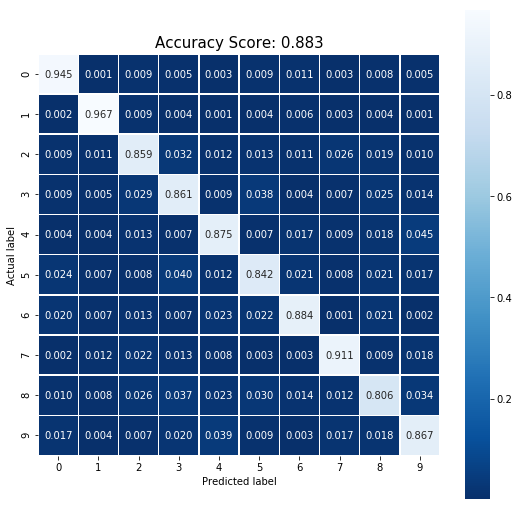

In [12]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_normalized, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {:.3f}'.format(score) 
plt.title(all_sample_title, size = 15)

# ---------

## 2) RANDOM FORESTS
Πρόκειται για μια μέθοδο συγχώνευσης όπου δημιουργείται ενα συγχωνευμένο πλήθος από classification decision trees το οποίο έχει αντίστοιχο αποτέλεσμα με έκαστο tree.

O αλγόριθμος τρέχει σύμφωνα με τοTree bagging:

Δοσμένου ενός training set X = x1, ..., xn 
με Y = y1, ..., yn αποτελέσματα, ο bagging αλγόριθμος διαλέγει επαναλαμβανόμενα ένα τυχαίο δείγμα απο το training set και εφαρμόζει πάνω σε αυτό ένα μοντέλο classification tree, έτσι έχει διαφορετικά fitted μοντέλα από διαφορετικό training set.
Για το αποτέλεσμα κάθε πρόβλεψης συμψηφίζονται τα αποτελέσματα όλων των δέντρων που χρησιμοποιήθηκαν.

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
#δημιουργια μοντελου, επαναλαμβανομες προσπαθειες για την ευρεση καλυτερου maxdepth
rfclf = RandomForestClassifier(max_depth=15, random_state=1)

#Ξεκινάμε να μαθαίνουμε για τα ψηφία την χρονική στιγμή
start_time = dt.datetime.now()
print('Start learning at {}'.format(str(start_time)))

rfclf.fit(X, y)

end_time = dt.datetime.now() 
print('Stop learning {}'.format(str(end_time)))
elapsed_time= end_time - start_time
print('Elapsed learning {}'.format(str(elapsed_time)))

Start learning at 2018-01-25 22:59:14.092839
Stop learning 2018-01-25 22:59:17.749089
Elapsed learning 0:00:03.656250


### Measuring Model Performance

In [15]:
#μετρημένη ακριβεια απο sklearn βιβλιοθηκη
y_pred=rfclf.predict(X_test)
score = rfclf.score(X_test,y_test)
score

0.94599999999999995

In [16]:
#γενικη μεθοδος ευρεσης
count = 0
for i in range(0, y_pred.size):
    if y_pred[i]==y_test[i]:
        count= count +1

accuracy = count / y_pred.size
print(accuracy*100 , "% accuracy στα αποτελεσματα μας")

94.6 % accuracy στα αποτελεσματα μας


### Confusion Matrix

In [17]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

Text(0.5,1,'Accuracy Score: 0.946')

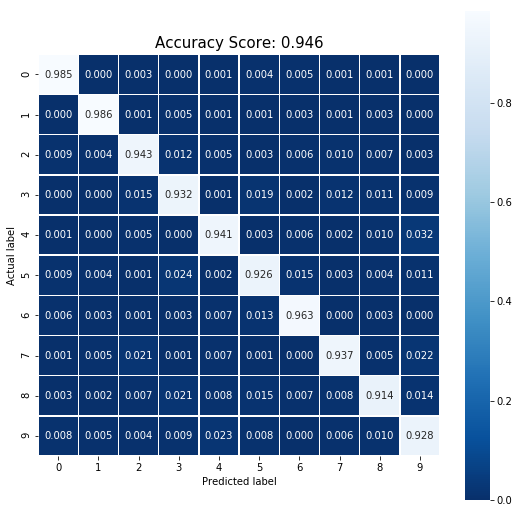

In [18]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_normalized, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {:.3f}'.format(score) 
plt.title(all_sample_title, size = 15)

# ------

## 3) LOGISTIC REGRESSION

Συνήθως η logistic regression μεθοδος προβλεπει τη πιθανοτητα μια εξαρτημενη μεταβλητη y να παρει την τιμη 1 ή 0.

Σε ενα πρόβλημα κατηγοριοποιησης με πολλες κλάσεις όπως το δικό μας, θέλουμε ενα μοντελο που να προβλέπει τις πιθανότητες για κάθε διαφορετκό πιθανό αποτελέσμα του εξαρτημένου y σε σχεση με τις ανεξάρτητες μεταβλητές μας.

Η  Multinomial logistic regression μέθοδος είναι μια λύση στο πρόβλημα της κατηγοριοποίησης που υποθέτει ότι ο γράμμικος συνδυασμός των χαρακτηριστικών που έχω παρατηρήσει (στην περιπτωσή μας η φωτεινότητα των pixel) ,και γενικότερα κάποιων παραμέτρων σχετικών με το πρόβλημα, μπόρει να χρησιμοποιηθει για να αποφασίσουμε την πιθανότητα το y (η εξαρτημενη μεταβλητη μας) να ανήκει σε κάθε μια κατηγορία ξεχωριστά

Για τυχαια κλάση k θα χρησιμοποιησω την γραμμικη συναρτηση προβλεψης $f(k,i)=\beta _{0,k}+\beta _{1,k}x_{1,i}+\beta _{2,k}x_{2,i}+\cdots +\beta _{M,k}x_{M,i}$, ωστε να δω τη πιθανοτητα το στοιχειο μου να ανηκει σαυτην την κλαση.
Με τους ίδιους συντελεστες ${\displaystyle \beta _{m,k}} $ θα υπολογισω τις πιθανοτητες για τις υπολοιπες κλασεις.
Οι συντελεστες ειναι παραγωγο των δοσμενων χαρακτηριστικων.

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
#Make an instance of the Model

# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [21]:
#Ξεκινάμε να μαθαίνουμε για τα ψηφία την χρονική στιγμή
start_time = dt.datetime.now()
print('Start learning at {}'.format(str(start_time)))

logisticRegr.fit(X, y)

end_time = dt.datetime.now() 
print('Stop learning {}'.format(str(end_time)))
elapsed_time= end_time - start_time
print('Elapsed learning {}'.format(str(elapsed_time)))

Start learning at 2018-01-25 23:01:54.014714
Stop learning 2018-01-25 23:02:54.686589
Elapsed learning 0:01:00.671875


In [22]:
X_test = dftest[:,1:]
y_test =dftest[:,0]
# Returns a NumPy Array
# Predict for Multiple Observations (images) at Once
y_pred = logisticRegr.predict(X_test) 
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)


### Measuring Model Performance
accuracy (fraction of correct predictions): correct predictions / total number of data points
Basically, how the model performs on new data (test set)

In [23]:
score = logisticRegr.score(X_test, y_test) # στο score πρεπει να βαλουμε το ytest? ή το predicted?? 
print(score)

0.9173


In [24]:
count = 0
for i in range(0, y_pred.size):
    if y_pred[i]==y_test[i]:
        count= count +1

accuracy = count / y_pred.size
print(accuracy*100 , "% accuracy στα αποτελεσματα μας")

91.73 % accuracy στα αποτελεσματα μας


### Confusion Matrix


In [25]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

Text(0.5,1,'Accuracy Score: 0.917')

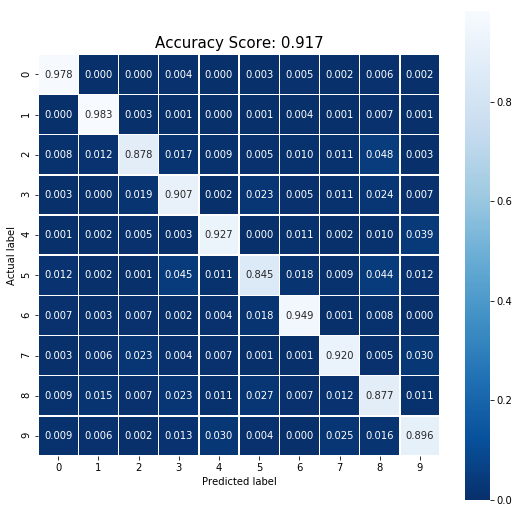

In [26]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_normalized, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {:.3f}'.format(score) 
plt.title(all_sample_title, size = 15)

### -----

## 4) SUPPORT VECTOR CLASSIFICATION

Πρόκειται για μια μέθοδο με πρωταρχική χρήση την διαδική κατηγοριοποίηση αλλά μπορούμε να τη χρησιμοποιήσουμε για πολλές κλάσεις μέσω της svm.SVC μέθοδου της βιβλιοθήκης sklearn της γλώσσας python.

H svm μέθοδος στις δυο διαστάσεις βρίσκει ενα διάνυσμα το οποίο έχει την μεγαλύτερη δυνατή απόσταση από τα δυο πιθανά σύνολα. Στις πολλές διαστάσεις όπως το πρόβλημά μας, δημιουργεί ενα υπερεπίπεδο (hyperplane).

Η δημιουργία του υπερεπιπέδου μπορεί να γίνει με δύο τρόπους:
Α) one versus the rest (υπολογίζει ποια ανήκουν στην πρώτη κλάση σε σχέση με την πληροφορία ολων, έπειτα από τα απομείναντα στοιχεία υπολογίζει ποια ανήκουν στη δεύτερη κλάση σε σχέση με όλα κοκ)
B) one vs one (υπολογίζει ενα υπερεπίπεδο για κάθε κλάση ξεχωριστά ,δηλ πως ξεχωρίζει η καθε κλάση από τις υπόλοιπες, και έπειτα συνδυάζει την πληροφορία όλων των υπερεπιπέδων που βρήκε)

Στην svm χρησιμοποιείται και το kernel trick δηλ τα δεδομένα μου αποκτούν μια επιπλέον διάσταση στην υπολογιστική τους αναπαράσταση για ευκολότερο διαχωρισμό.

In [27]:
from sklearn.svm import SVC

In [ ]:
# Create a classifier: a support vector classifier

svcclassifier = SVC(probability=False, cache_size=2000, kernel="rbf", C=2.8, 
                    gamma=.001)
# We learn the digits on the first half of the digits

#Ξεκινάμε να μαθαίνουμε για τα ψηφία την χρονική στιγμή
start_time = dt.datetime.now()
print('Start learning at {}'.format(str(start_time)))

svcclassifier.fit(X, y)

end_time = dt.datetime.now() 
print('Stop learning {}'.format(str(end_time)))
elapsed_time= end_time - start_time
print('Elapsed learning {}'.format(str(elapsed_time)))

Start learning at 2018-01-25 22:11:54.374089


In [ ]:
# Now predict the value of the digit on the second half:
y_pred = svcclassifier.predict(X)

print("Classification report for classifier %s:\n%s\n"
      % (svcclassifier, metrics.classification_report(y, y_pred)))

### Measuring Model Performance

In [ ]:
count = 0
for i in range(0, y_pred.size):
    if y_predict[i]==y[i]:
        count= count +1

accuracy = count / y_pred.size
print(accuracy*100 , "% accuracy στα αποτελεσματα μας")

### Confusion Matrix

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_normalized, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {:.3f}'.format(accuracy) 
plt.title(all_sample_title, size = 15)

## ----

## 5) SOFTMAX REGRESSION WITH TENSORFLOW

Όπως υποδηλώνει το όνομα, στην softmax regression (SMR), αντικαθιστούμε τη sigmoid logistic συνάρτηση από τη λεγόμενη συνάρτηση softmax φ: $ P( y = j | z^{(i)} = \Phi _{sotmax}(z^{(i)}) = \frac{e^{z^{(i)}}}{\sum_{j=0}^ke^{z^{(i)}} } $


Υπάρχουν μόνο δέκα πιθανά πράγματα που μπορεί να είναι μια δεδομένη εικόνα. Θέλουμε να μπορούμε να δούμε μια εικόνα και να δώσουμε τις πιθανότητες να είναι κάθε ψηφίο. Αυτή είναι μια κλασική περίπτωση όπου το softmax regression είναι ένα φυσικό, απλό μοντέλο.
Γενικά, μας δίνει μια λίστα τιμών μεταξύ 0 και 1 που προσθέτουν μέχρι 1. Εχει δύο βήματα πρώτα προσθέτουμε τα στοιχεία της εισροής μας σε ορισμένες κατηγορίες, και στη συνέχεια μετατρέπουμε τα στοιχεία αυτά σε πιθανότητες.
Για να συγκεντρώσουμε τα στοιχεία που αποδεικνύουν ότι μια δεδομένη εικόνα είναι σε μια συγκεκριμένη κλάση, κάνουμε ένα σταθμισμένο άθροισμα των εντάσεων των pixels. Το βάρος είναι αρνητικό εάν το pixel που έχει υψηλή ένταση είναι διάφορο από την εικόνα που βρίσκεται σε αυτή την κατηγορία και θετικό αν ύπάρχουν αποδεικτικά στοιχεία ότι ταιρίαζει.

In [28]:
from __future__ import absolute_import 
from __future__ import division 
from __future__ import print_function

import argparse
import sys

from tensorflow.examples.tutorials.mnist import input_data #Loads MNIST data
#mnist is a lightweight class that stores the training, validation and testing, sets as NumPy arrays
#Also provides a function for iterating through data minibatches
mnist = input_data.read_data_sets('MNIST_data', one_hot = True)

import tensorflow as tf
sess = tf.InteractiveSession() 
# αυτό το session κάνει το tensorflow πιο ευέλικτο ως προς το hw επειδή κώδικας είναι δομημένος
#επιτρέπει να μεταβάλονται οι λειτουργίες που κατασκευάζουν το γράφημα με αυτές που εκτελούνται i

## BUILDING A SOFTMAX REGRESSION MODEL

# PLACEHOLDERS
# building computation graph by creating nodes for input images and target output classes
# Placeholders are a value that we will input when we ask tf to run a computation
# Input image x will consist a 2d tensor of floating point numbers, and we will assign it a shape of [None, 784]
# where 784 is the dimensionality of a single flattened 28 by 28 pixel MNIST image, None indicates that the first 
# dimension, corrosponding to the batch size, can be of any size

# The target output classes y_ will also consist a 2d tensor, each row is a one-hot 10-dim vector indicating which
# digit class (0-9) the corrosponding MNIST image belongs in 
# Shape argument is optional but helps TF to catch bugs stemming from inconsistent tensor shapes

x = tf.placeholder(tf.float32, shape = [None, 784])
y_ = tf.placeholder(tf.float32, shape = [None, 10])

# VARIABLES
# A value that lives in TF's computation graph. It can be used and modified by computation
# defining weights W and biases b for the model. These can be treated like additional inputs
# initailize both as tensors full of zeros
# W is a 784 x 10 matrix --> 784 input features and 10 outputs
# b is a 10d vector

W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

start_time = dt.datetime.now()
print('Start learning at {}'.format(str(start_time)))

# Here we initialize the variables using this session
sess.run(tf.global_variables_initializer())

# PREDICTED CLASS AND LOSS FUNCTION
# Regression model can now be implemented in one line! We multiply the vectorized input images  by the weight W and add b

y = tf.matmul(x,W) + b

# Now to specify the loss function. Loss indicates how bad the model's prediction was on a single example
# The goal is to ofcourse minimize that while training across all the examples
# Loss function here is the cross entropy bw the target and the softmax activation function applied
# to the model's prediction
# tf.nn.softmax_cross_entropy_with_logits internally applies softmax on the model's unnormalized
# model prediction and sums across all classes, and tf.reduce_mean takes the average sums across all classes
# tf.reduce_mean takes the average over these sums

cross_entropy = tf.reduce_mean(
  tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))

## TRAIN THE MODEL

# TF will use automatic differentiation to find the gradients of the loss wrt each of the variables
# TF has a bunch of built in optimization algorithms to achieve this
# here I will use steepest gradient descent, w a step length of 0.5, to decend the cross entropy
# TF will add new operations to the computation through this one line
# these include ones to compute gradients, compute parameter update steps and apply update steps to parameters
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

# when train_step is returned above, it can apply gradient decent updates to parameters. So the model can 
# be trained by repeatedly using train_step

for _ in range (1000):
 batch = mnist.train.next_batch(100)
 train_step.run(feed_dict = {x:batch[0], y_:batch[1]})

# Above I am loading 100 training examples in each training interation. I then run the training_step operation
# using feed_dict to replace the placeholder tensors x and y_ with training examples
# Note: Any tensor in the graph can be replaced using feed_dict - not just placeholders

## MODEL EVALUATION

# First things first, we will figure out where we predicted the correct label
# tf.argmax is useful as it gives the index of the highest entry in a tensor along some axis
# For example, tf.argmax(y,1) is the label our model thinks is most likely for each input
# while tf.argmax(y_,1) is the true label. We can use tf.equal to check if our
# prediction matches the truth.

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

# this will give us a list of booleans, to determine the correct fraction we cast to 
# floating point numbers and then take the mean
# For instance: [True, False, True, True] would become [1,0,1,1] which would become 0.75

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

end_time = dt.datetime.now() 
print('Stop learning {}'.format(str(end_time)))
elapsed_time= end_time - start_time
print('Elapsed learning {}'.format(str(elapsed_time)))

# finally evaluating the accuracy on test data

print ('Accuracy is: ', accuracy.eval(feed_dict = {x: mnist.test.images, y_: mnist.test.labels}))

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Start learning at 2018-01-25 23:05:07.389714
Stop learning 2018-01-25 23:05:08.655339
Elapsed learning 0:00:01.265625
Accuracy is:  0.9193


# Παρατηρήσεις



1) Απαιτούμενος χρόνος για:    
α. την εφαρμογή του decision tree t = 11.593750 sec  
β. την εφαρμογή των random forests t = 3.437500 sec  
γ. την εφαρμογή του logistic regression t = 62.171875 sec  
δ. την εφαρμογή του support vector t = None
ε. την εφαρμογή του softmax regression t = 1.265625 sec  

Παρατηρούμε πως πιο γρήγορος αλγόριθμος για το classification 60.000 εικόνων με ψηφία είναι τo softmax regression. Το decision tree επίσης παράγει αποτελέσματα σε αμεληταίο χρόνο.
Όσον αφορά το  logistic regression , απ' τις μετρήσεις φαίνεται πως απαιτεί αρκετά περισσοτερο χρόνο επειδή χρησιμοποιεί όλα τα δεδομένα για να παράγει τα αποτελέσματά του. Αυτό τον καθιστά ακατάλληλο για μεγάλα data sets.





2) Το ποσοστό ακρίβειας για:  
α. την εφαρμογή του decision tree Accuracy Score: 88.3%  
β. την εφαρμογή των random forests Accuracy Score: 94.6%  
γ. την εφαρμογή του logistic regression Accuracy Score: 91.7%  
δ. την εφαρμογή του support vector Accuracy Score: None
ε. την εφαρμογή του softmax regression Accuracy Score: 91.9%  


Το μεγαλύτερο πρόβλημα που σχετίζεται με τα decision trees είναι ότι αποτελούν αρκετά μεροληπτικά μοντέλα. Μπορούμε να δημιουργήσουμε ένα decision tree model στο training set μας το οποίο θα ξεπεράσει όλους τους άλλους αλγόριθμους, αλλά θα αποδειχθεί ότι είναι ένας κακός προγνωστικός παράγοντας στο test set μας. Αυτό προκαλείται λόγο του over fitting.
Over fitting συμβαίνει όταν το δέντρο σχεδιάζεται έτσι ώστε να ταιριάζει απόλυτα σε όλα τα δείγματα στο train set. Έτσι καταλήγει σε κλάδους με αυστηρούς κανόνες αραιών δεδομένων. Aυτό επηρεάζει την ακρίβεια κατά την πρόβλεψη δειγμάτων που δεν αποτελούν μέρος του train set.

Το πρόβλημα του over fitting υπερνικάται σε μεγάλο βαθμό με τη χρήση random forests, τα οποία δεν είναι παρά μια πολύ έξυπνη επέκταση των decision trees.



3) Σημασία ακρίβειας 
Στις μεθοδους random forests και logistic regression οπου βλέπουμε το ποσοστό ακρίβειας να ανεβαίνει μπορούμε να δουμε απο τον confusion matrix ότι η πιθανοτητα να εχω μπερδεψει ενα ψηφίο με κάποια απο τα υπόλοιπα 9 εξαλείφεται έτσι σε περίπτωση λάθους μπόρω πιο εύκολα να μελετήσω τα δεδομένα μου ωστέ να βρω μέσω του συλλογισμού μου ποιο είναι το σωστό.



4) Η εφαρμογή του C-SUPPORT VECTOR CLASSIFICATION δεν ήταν δυνατή γιατί το μοντέλο δεν είναι πολύ αποτελεσματικό με μεγάλο αριθμό παρατηρήσεων.  
Επιπλέον μπορεί να μην χρησιμοποιήθηκε ο κατάλληλος πυρήνας. Με τους μη γραμμικούς πυρήνες, τα SVM μπορούν να είναι πολύ δαπανηρά για να εκπαιδεύσουντεράστια δεδομένα.(Δεν κατάφερε να τρέξει compile σε διαρκεια 1 ώρας επομένως θεωρήθηκε ακατάλληλο μοντέλο για τα συγκεκριμένα δεδομένα)
